In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('./drive')

Mounted at ./drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from tqdm.notebook import tqdm

In [ ]:
!cp 'drive/MyDrive/optimizer/data/R11.zip' R11.zip

In [ ]:
!unzip R11.zip

Archive:  R11.zip
  inflating: R11.txt                 


In [ ]:
!head R11.txt

3 300 3 3 0
1 1 1
171.368388376979080 57.427946278949662 1.005624632849878
153.865767716253030 47.447070734463942 30.708606482379064
155.091260765797390 50.486731532677240 26.563797489872467
150.406426199411730 47.077035604190890 23.670247579170969
147.594765669821040 30.663975101793959 12.068286297032429
154.651525997527980 25.666384139773260 12.876235364690290
177.922641513371050 50.161860484575449 23.941005548625355
175.756423096356510 58.894747953296303 11.361627247907649


In [ ]:
with open('R11.txt') as fp:
  line = fp.readline()
  line = line.split(' ')
  d, n, m, k, p = [int(item) for item in line]
  line = fp.readline()
  line = line.split(' ')
  K = [int(item) for item in line]


In [ ]:
!tail -n +3 R11.txt > R11_clean.txt

In [ ]:
vectors = np.fromfile('R11_clean.txt', sep=' ').reshape(n, -1)

In [ ]:
vectors

array([[ 1.71368388e+02,  5.74279463e+01,  1.00562463e+00],
       [ 1.53865768e+02,  4.74470707e+01,  3.07086065e+01],
       [ 1.55091261e+02,  5.04867315e+01,  2.65637975e+01],
       [ 1.50406426e+02,  4.70770356e+01,  2.36702476e+01],
       [ 1.47594766e+02,  3.06639751e+01,  1.20682863e+01],
       [ 1.54651526e+02,  2.56663841e+01,  1.28762354e+01],
       [ 1.77922642e+02,  5.01618605e+01,  2.39410055e+01],
       [ 1.75756423e+02,  5.88947480e+01,  1.13616272e+01],
       [ 1.66985045e+02,  3.18207081e+01,  2.79983788e+01],
       [ 1.65889412e+02,  3.05142192e+01,  2.30599169e+00],
       [ 1.63421153e+02,  3.92239521e+01,  9.69041547e+00],
       [ 1.47073503e+02,  4.74626802e+01,  2.53588176e+01],
       [ 1.59881015e+02,  5.63421429e+01,  2.85473372e+01],
       [ 1.76090789e+02,  3.56167575e+01,  2.47252452e+01],
       [ 1.63028274e+02,  4.07819893e+01,  1.60690434e+01],
       [ 1.55411329e+02,  4.88891595e+01,  1.63631419e+01],
       [ 1.78332587e+02,  3.35098267e+01

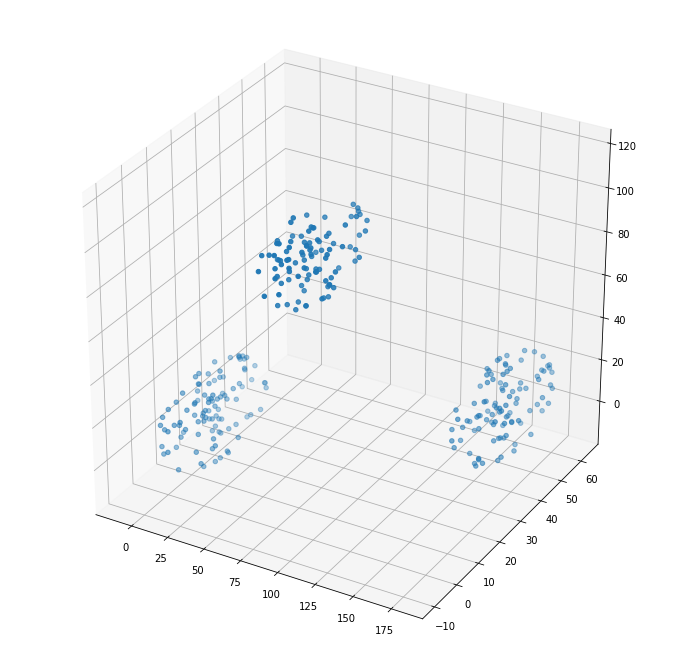

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

S = vectors[]

ax.scatter(vectors[:, 0], vectors[:, 1], vectors[:, 2])
_ = plt.show()


In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=k, covariance_type='spherical',
                      n_init=64, max_iter=1000, random_state=0)
gmm.fit(vectors)

GaussianMixture(covariance_type='spherical', max_iter=1000, n_components=3,
                n_init=64, random_state=0)

In [ ]:
gmm.means_

array([[ 86.5376907 ,   8.54814493,  98.51306899],
       [163.16256377,  43.84639367,  14.39892178],
       [  7.16853106,  15.1380166 ,   8.06166929]])

In [ ]:
labels = gmm.predict(vectors)

In [ ]:
from numba import jit

@jit
def noisy_center_radius(points, k):
  dist_matrix = np.zeros((points.shape[0], points.shape[0]))
  for i in range(points.shape[0]):
    for j in range(i):
      dist = np.linalg.norm(points[i] - points[j])
      dist_matrix[i, j] = dist
  dist_matrix = dist_matrix.reshape(-1)
  top_k_dist = np.argsort(dist_matrix)[-k:]
  rows = top_k_dist // points.shape[0]
  cols = top_k_dist % points.shape[0]
  center = 0.5*(points[cols] + points[rows]).mean(axis=0)
  radius = np.ceil(dist_matrix[top_k_dist].mean())/2
  return center, radius


  ind = dist.argmax()
  np.argpartition(-scores, -k)[-k:]
  row = (torch.div(ind, points.size(0), rounding_mode='floor')).item()
  col = (ind % points.size(0)).item()
  radius = (dist[row, col]/2).item()
  center = 0.5 * (points[row] + points[col])
  return center, radius

def center_radius(points):
  dist = torch.cdist(points, points)
  ind = dist.argmax()
  row = (torch.div(ind, points.size(0), rounding_mode='floor')).item()
  col = (ind % points.size(0)).item()
  radius = (torch.ceil(dist[row, col]/2)).item()
  center = 0.5 * (points[row] + points[col])
  return center, radius

manifold_center = []
manifold_radius = []

for sphere in range(k):
  points = vectors[labels==sphere]
  center, radius = noisy_center_radius(points, 6)
  manifold_center.append(center)
  manifold_radius.append(radius)

manifold_center = np.vstack(manifold_center)

<ipython-input-55-1cbe20a5ea79>:3: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "noisy_center_radius" failed type inference due to: - Resolution failure for literal arguments:
AssertionError()
- Resolution failure for non-literal arguments:
AssertionError()

During: resolving callee type: BoundFunction(array.mean for array(float64, 2d, C))
During: typing of call at <ipython-input-55-1cbe20a5ea79> (14)


File "<ipython-input-55-1cbe20a5ea79>", line 14:
def noisy_center_radius(points, k):
    <source elided>
  cols = top_k_dist % points.shape[0]
  center = 0.5*(points[cols] + points[rows]).mean(axis=0)
  ^

  @jit
<ipython-input-55-1cbe20a5ea79>:3: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "noisy_center_radius" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-55-1cbe20a5ea79>", line 6:
def noisy_ce

In [ ]:
manifold_radius

[20.0, 20.0, 20.0]

In [ ]:
manifold_center

array([[ 85.11007249,   9.85626001,  98.71850569],
       [162.38627318,  43.83143158,  13.27335839],
       [  7.73429131,  14.48613704,   6.18663811]])

In [ ]:
def sample_sphere(d, r, center, N):
  X = np.random.normal(size=(N,d))
  Y = r * X / np.linalg.norm(X, axis=1).reshape(N, 1) + center
  return Y

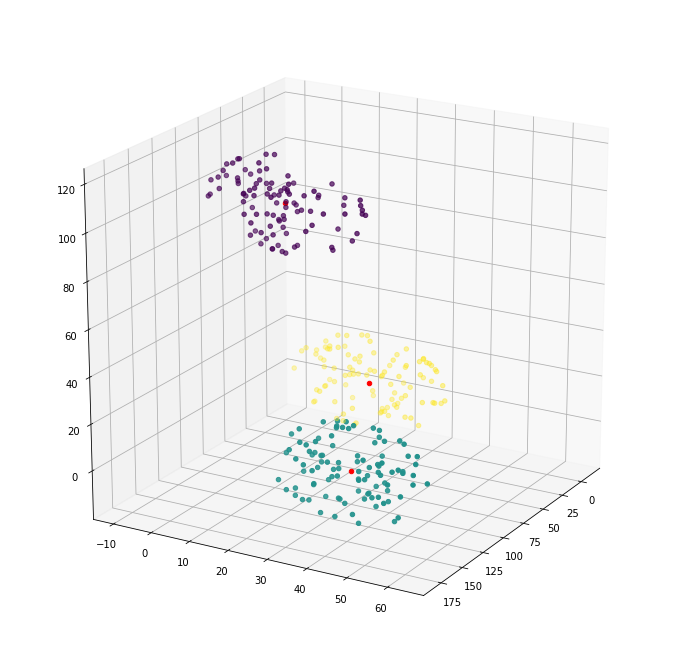

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.view_init(elev=20., azim=30)
ax.scatter(vectors[:, 0], vectors[:, 1], vectors[:, 2], c=labels)
for sphere in range(k):
  ax.scatter(manifold_center[sphere, 0], manifold_center[sphere, 1], manifold_center[sphere, 2], c='red')


_ = plt.show()

In [ ]:
from scipy.optimize import minimize, differential_evolution

def loss_center_given_radius(center, points, radius):
  return (((points - center)**2).sum(axis=1) > radius**2).sum()

def estimate_corrected_radius(sphere):
  b1 = manifold_center[sphere, :] - 0.5
  b2 = manifold_center[sphere, :] + 0.5
  bounds = [(b1[i], b2[i]) for i in range(3)]
  center = differential_evolution(func=loss_center_given_radius,
                        bounds=bounds, maxiter=2000, popsize=256,
                        args=(vectors[labels==sphere], 20.01)).x
  return center

In [ ]:
manifold_corrected_center = np.vstack([estimate_corrected_radius(sphere) for sphere in tqdm(range(k))])

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
manifold_center

array([[ 85.11007249,   9.85626001,  98.71850569],
       [162.38627318,  43.83143158,  13.27335839],
       [  7.73429131,  14.48613704,   6.18663811]])

In [ ]:
manifold_corrected_center

array([[ 85.24321719,   9.97747917,  98.26835121],
       [162.37521819,  44.12224894,  12.91205599],
       [  8.10415188,  14.56142758,   6.4516104 ]])

In [ ]:
# n = 5
with open('output_gmm_corrected.txt', 'w+') as fp:
  fp.write(f'{n} {k}\n')
  for sphere in range(k):
    fp.write(f'{d} {K[sphere]} Sphere\n')
    fp.write('\n')
    vec_ind = np.where(labels == sphere)[0]
    fp.write(' '.join(manifold_corrected_center[sphere, :].astype(str).tolist()) + f' {manifold_radius[sphere]} \n')
    fp.write(f'{len(vec_ind)} ')
    fp.write(' '.join((vec_ind+1).astype(str).tolist()))
    fp.write('\n')
  fp.write(f'{p}')